In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import metrics
from math import sqrt

df = pd.read_csv('result.csv')
cols_drop = []
for col in df.columns.values:
    if df[col].isnull().sum()/ 480.0 > 0.5:
        cols_drop.append(col)
df = df.drop(cols_drop, axis=1)
df = df.fillna(0)
region = df.region_name.unique()

def split_region(i):
    val_state = np.array([region[3*i], region[3*i+1], region[3*i+2]])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

def cross_val(neigh,typ):
    score_list_cv = []
    
    if typ == "region":
        for i in range(0,5):
            train, val = split_region(i)
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
    
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
        return min(score_list_cv)
    
    elif typ == "time":
        for i in range(0,2):
            if i == 0:
                train = df.loc[df['date'] < '2020-08-10']
                val = df.loc[df['date'] >= '2020-08-10']
            else:
                train = df.loc[df['date'] >= '2020-08-10']
                val = df.loc[df['date'] < '2020-08-10']
            
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
        
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
        return min(score_list_cv)     
    return 0


In [2]:
score_list = []
for k in range(1,100):
    '''
    score_list_cv = []
    for i in range(0,4):
        train, val = split_region(i)
        x_train = train.iloc[:,2:-1]
        y_train = train.iloc[:, -1]
        x_val = val.iloc[:,2:-1]
        y_val = val.iloc[:,-1] 
    
        neigh = KNN(k)
        neigh.fit(x_train, y_train)
        y_pred = neigh.predict(x_val)
        score_list_cv.append(sqrt(metrics.mean_absolute_error(y_val,y_pred)))
    score_list.append(min(score_list_cv))
    '''
    score_list.append(cross_val(KNN(k),"region"))


In [3]:
print(min(score_list))
print(score_list)

33.322331517734135
[34.28815798169651, 33.322331517734135, 46.46996906273296, 44.73426166448561, 48.666410958232326, 48.80037757898859, 50.48328341898836, 51.93562722255311, 52.254775774285456, 53.51863745981913, 54.02209611526444, 52.160716587660794, 50.25035612409419, 50.357685463698296, 49.80816879802294, 50.27053158149525, 49.40058619273745, 48.38985059497049, 47.41506929819659, 46.37706718962629, 46.15005649822782, 46.1276022929504, 45.70254823698475, 45.29472757042493, 44.948514349444544, 44.99953173837747, 44.53665691170139, 44.25488686391446, 43.793649195622, 43.83794568044311, 43.3833862052708, 43.05557578684561, 42.862559658845754, 42.640839641189665, 42.77100359237926, 42.43030283208566, 42.069092627491344, 41.66630101409272, 41.572890835163626, 41.420928938963534, 41.36058922373603, 41.28920020617874, 41.21938495479912, 41.10837759724514, 40.948828651149896, 40.77634108951664, 40.55755293214905, 40.55993382711793, 40.46681032337687, 40.369511818257656, 40.31864633039535, 40

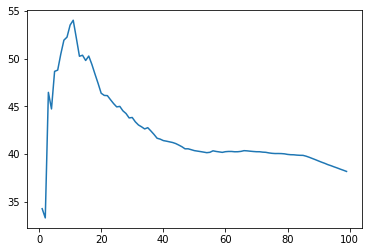

In [4]:
plt.plot(range(1,100),score_list)

20.340440226487328
[20.340440226487328, 30.755347041957727, 32.33561470637528, 30.431402978998936, 33.01956356321399, 33.58681998520909, 33.94068143573874, 30.45564054703138, 30.813270104168947, 30.11030074894474, 29.35347072753753, 31.656348693693356, 33.02839149028206, 34.88524444623345, 35.77424742114616, 34.919197660372106, 33.71431014722374]


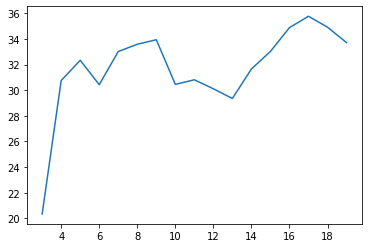

In [5]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"region"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

29.33638560573138
[65.75908920065727, 53.67243676925802, 52.49620521999662, 47.27894182237743, 45.50939463451475, 44.29700941827538, 42.44536178718351, 39.75738648695909, 38.82156995771142, 39.654206507632956, 38.35352859896643, 40.09158014068644, 40.3510569131575, 39.801304672525546, 39.326884181745754, 38.501562309768275, 37.69858606106415, 37.12278124475157, 36.316342184485826, 35.304188181078466, 34.42276134659289, 33.78634000670321, 32.93389182143026, 31.99333142626551, 31.44569485637104, 31.109841384265238, 30.92726263328748, 30.167847973285827, 29.785725621555972, 29.49113155302417, 29.372455997174146, 29.42812501037021, 29.53230221535596, 29.42261564542971, 29.33638560573138, 29.53701034681106, 29.592892918959482, 29.705171515546002, 29.736207707382057, 30.03593778448993, 30.186090851036727, 30.44342146684556, 30.950915653549433, 30.64363160529447, 30.090453207427686, 30.29751641838652, 30.477042151747195, 30.50092107219338, 32.11507170864995, 32.69400934230918, 33.103406516489

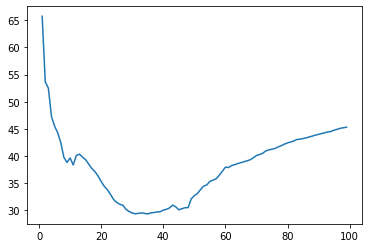

In [6]:
score_list = []
for k in range(1,100):
    score_list.append(cross_val(KNN(k,p=1),"time"))

print(min(score_list))
print(score_list)
plt.plot(range(1,100),score_list)

40.10736981162139
[40.10736981162139, 41.51541486512493, 40.284600234805175, 88.08395675178895, 41.713452718393256, 89.3491987218926, 45.444369648307806, 86.66539107527166, 88.08952877981483, 87.42038716403975, 87.75240944584097, 87.18504627869142, 47.93560540584629, 46.68427867066171, 46.94777683767358, 46.94777683767358, 46.94777683767358]


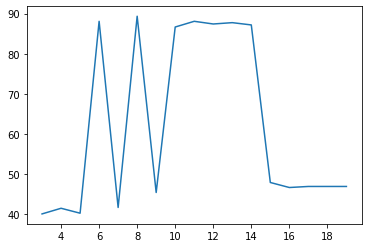

In [7]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"time"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)